In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('heart.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import metrics
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [16]:
##Importing Data
df = pd.read_csv('heart.csv')

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [22]:
# adaboost experiments
# create x and y train

X = df.drop('target', axis=1)
y = df[['target']]

# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 13)
(820, 1)
(205, 13)
(205, 1)


In [23]:
# check the average cancer occurence rates in train and test data, should be comparable
print(y_train.mean())
print(y_test.mean())

target    0.520732
dtype: float64
target    0.482927
dtype: float64


In [24]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=1, random_state = 100)

In [25]:
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.7463414634146341

In [26]:
# adaboost with the tree as base estimator
estimators = list(range(20,25))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    # base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [27]:
abc_scores

[0.8439024390243902,
 0.8536585365853658,
 0.8780487804878049,
 0.8829268292682927,
 0.8634146341463415]

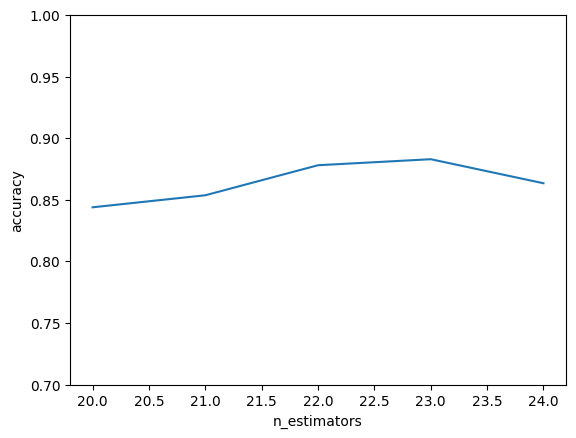

In [28]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.70, 1])
plt.show()

In [53]:
ABC = AdaBoostClassifier(
    # base_estimator=shallow_tree, 
    n_estimators = 22)
    
ABC.fit(X_train, y_train)
y_pred = ABC.predict(X_test)

In [58]:
y_pred[0]

0

In [55]:
np.array(y_test).T

array([[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1]], dtype=int64)

In [56]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [57]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [205, 1]

In [34]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[92 14]
 [11 88]]


In [35]:
print(accuracy_score(y_test,y_pred))

0.8780487804878049


In [39]:
from joblib import dump
dump('ABC', './adaboost.joblib')

['./adaboost.joblib']

In [44]:
import joblib


# Load mô hình từ file đã được lưu
loaded_model = joblib.load('./adaboost.joblib')

# Nhập dữ liệu từ người dùng (ở đây, giả sử là một mẫu)
user_input = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]

# Dự đoán kết quả với mô hình đã được huấn luyện
prediction = loaded_model.predict(user_input)

# In kết quả dự đoán
print("Dự đoán của mô hình:", prediction)


AttributeError: 'str' object has no attribute 'predict'